<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Guarango Veletanga Johanna Estefania** 

**22-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [9]:
def download_pubmed (keyword):
    """
    Funcion que pide como entrada la frase de busqueda y como output muestra una lista de 
    id de la busqueda realizada
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank 
    Entrez.email = 'your.email@example.com'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='1000',
                        retmode='xml',
                        term=keyword)
    results = Entrez.read(handle)
    id_list = results["IdList"]
    ids = ','.join(id_list)
#id_l.append(ids)
    Entrez.email = 'your.email@example.com'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    id_l = ids.split(",")
    return (id_l) 


##mining_pubs 
import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """
    como entrada pide un codigo "DP", "AU" y "AD" y como salida muestra un data frame con los datos solicitados
    """
    with open("data/pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        ## Data frame con el PMID y año de publicación
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto)  
        pmid_year = pd.DataFrame()
        pmid_year["PMID"] = PMID
        pmid_year["Año de publicación"] = year
        return print(pmid_year)
    ## Data frame con el PMID y año de publicación 
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_autor = pd.DataFrame()
        pmid_autor["PMID"] = PMID 
        pmid_autor["Numero de autores"] = num_autores
        return print(pmid_autor)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"St\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        texto = re.sub(r"Md\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: ## 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["numero de autores"] = resultado.values()
        return print(veces_pais)
import miningscience as msc 

help(download_pubmed)
help(mining_pubs)


Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Funcion que pide como entrada la frase de busqueda y como output muestra una lista de 
    id de la busqueda realizada

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    como entrada pide un codigo "DP", "AU" y "AD" y como salida muestra un data frame con los datos solicitados




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [31]:
# Escriba aquí su código para el ejercicio 2. Para este ejercicio se requirió instalar pip install Bio

articulos = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(articulos)) 

print ("El PMID del primer articulo es:", articulos[0])

El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [1]:
import miningscience as msc
pub_year = msc.mining_pubs("DP")
print (pub_year.iloc[0:2])
print (pub_year.iloc[826:])
pub_authors = msc.mining_pubs("AU")
print (pub_authors.iloc[0:2])
print (pub_authors.iloc[826:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:2])
print (countries.iloc[112:])
print(pub_year)

       PMID Año de publicación
0  35113400               2021
1  34534714               2021
Empty DataFrame
Columns: [PMID, Año de publicación]
Index: []
       PMID  Numero de autores
0  35113400                  2
1  34534714                 11
Empty DataFrame
Columns: [PMID, Numero de autores]
Index: []
      pais  numero de autores
0  Ecuador                 14
1      USA                  8
Empty DataFrame
Columns: [pais, numero de autores]
Index: []
        PMID Año de publicación
0   35113400               2021
1   34534714               2021
2   33652915               2021
3   32931955               2020
4   32581039               2020
5   32462583               2020
6   32451213               2020
7   32362928               2020
8   32247171               2020
9   32221920               2020
10  31138640               2019
11  30056980               2018
12  29086402               2018
13  28878794               2017
14  27704815               2016
15  26217358               2

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2018.611111111111
La desviación estandar es:  2.2787738934603277


Text(0, 0.5, 'Frecuencia')

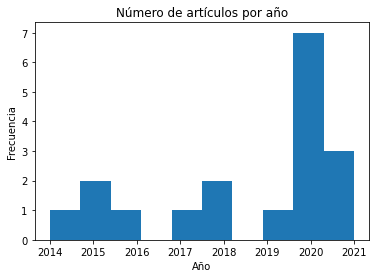

In [12]:
#Cálculo de la media y desviación estándar
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_year["Año de publicación"] = pub_year["Año de publicación"].astype("int")
mean_py = pub_year["Año de publicación"].mean()
sd_py = pub_year["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_year["Año de publicación"]), max(pub_year["Año de publicación"]))
plot.hist(x=pub_year["Año de publicación"])
plot.title("Número de artículos por año")
plot.xlabel("Año")
plot.ylabel("Frecuencia")


Text(0, 0.5, 'Frecuencia')

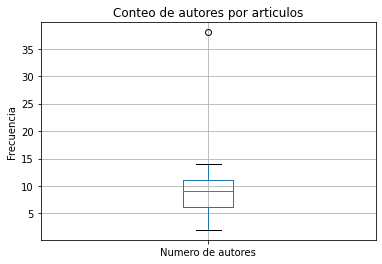

In [11]:
#Boxplot
pub_authors 
boxplot = pub_authors.boxplot(column=["Numero de autores"])
plot.title("Conteo de autores por articulos")
plot.ylabel("Frecuencia")

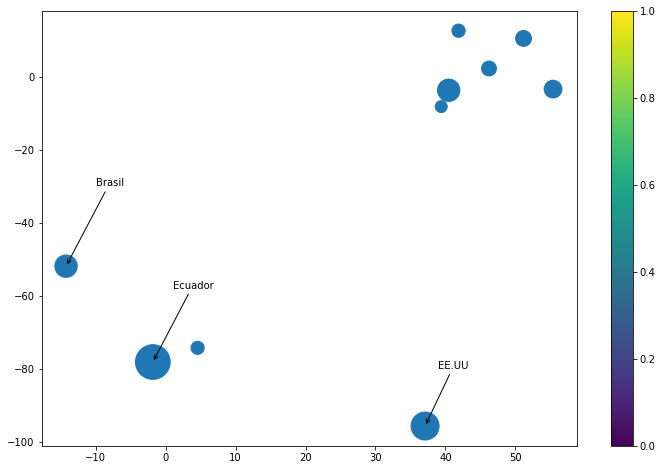

In [17]:
#Nube de puntos
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (1,-58), arrowprops = ard) 
plot.annotate("EE.UU", xy= (37.09024, -95.712891), 
            xytext = (39, -80), arrowprops = ard)
plot.annotate("Brasil", xy= (-14.235004, -51.92528), 
            xytext = (-10, -30), arrowprops = ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 2, plSize[1] * 2) )
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

* En el diagrama de barras se observa que en el año 2020 se han pubicado más artículos en comparación con otros.
* En el boxplot se puede observar que la mediana corta la caja en dos lados desiguales por lo que se tiene una asimetría negativa o sesgada a la izquierda debido a que la parte más larga es la inferior con respecto a la mediana. También se puede observar que el valor de la mediana es de aproximadamente 9 y que el gráfico presenta un valor atípico.
* En la nube de puntos se visualiza la cantidad de autores ubicados por país de procedencia. 

## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [8]:
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
with open("alignment.txt", "r") as f: 
    alignment = AlignIO.read(f, "clustal")
    #print(type(alignment))
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
#print(distance_matriz)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True 
Phylo.draw_ascii(tree)
#print (handle.read())

   ______________ MW834598.1
 ,|
 ||  _________________ MW834594.1
 ||_|
 |  |         ________________________________ BI977687.1
 |  |________|
 |           |____________________________________________________ CL569187.1
 |
_| _______________ MW834597.1
 ||
 ||  _____________ MW834596.1
 ||_|
 |  |__________ MW834595.1
 |
 |      _________ MW834601.1
 |  ___|
 |_|   |_____________ MW834600.1
   |
   |___________ MW834599.1



**Escriba aquí la interpretación del árbol**
Se puede observar que la parte superior del árbol filogenético (la que contiene a MW834598.1, MW834594.1, BI977687.1 y CL569187.1) posee 3 puntos de ramificación, los cuales representan un evento de divergencia o separación de un grupo en dos grupos descendientes, a diferencia de los otros que solamente tienen 2. Esto demuestra que BI977687.1 y CL569187.1 poseen un ancestro común más reciente en comparación con otros.

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```